In [5]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, confusion_matrix

In [7]:
# Load dataset
train = pd.read_csv('DATA.csv')

# Data overview
print("Dataset Head:")
display(train.head()) 

Dataset Head:


,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
0,P0,NaN,False,True,True,True,False,True,False,False,Negative
1,P1,Fever,True,False,True,True,False,False,True,False,Positive
2,P2,Fever,False,True,True,False,False,False,True,False,Positive
3,P3,NaN,True,False,False,False,True,True,True,False,Positive
4,P4,Swollen Lymph Nodes,True,True,True,False,False,True,True,False,Positive



Value Counts for Target Variable:


<Axes: xlabel='MonkeyPox'>

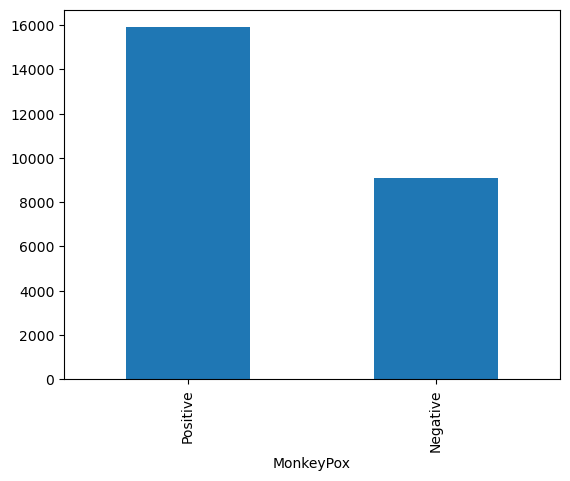

In [8]:
print("\nValue Counts for Target Variable:")
train['MonkeyPox'].value_counts().plot(kind='bar')


In [9]:
print("\nUnique values in 'Systemic Illness' column:")
print(train['Systemic Illness'].unique())


Unique values in 'Systemic Illness' column:
[nan 'Fever' 'Swollen Lymph Nodes' 'Muscle Aches and Pain']


In [10]:
print("\nDataset Description:")
display(train.describe())



Dataset Description:


,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
count,25000,18784,25000,25000,25000,25000,25000,25000,25000,25000,25000
unique,25000,3,2,2,2,2,2,2,2,2,2
top,P24999,Fever,False,True,True,False,True,True,True,False,Positive
freq,1,6382,12655,12554,12612,12514,12527,12533,12584,12554,15909


In [11]:
print("\nDataset Information:")
train.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Patient_ID                      25000 non-null  object
 1   Systemic Illness                18784 non-null  object
 2   Rectal Pain                     25000 non-null  bool  
 3   Sore Throat                     25000 non-null  bool  
 4   Penile Oedema                   25000 non-null  bool  
 5   Oral Lesions                    25000 non-null  bool  
 6   Solitary Lesion                 25000 non-null  bool  
 7   Swollen Tonsils                 25000 non-null  bool  
 8   HIV Infection                   25000 non-null  bool  
 9   Sexually Transmitted Infection  25000 non-null  bool  
 10  MonkeyPox                       25000 non-null  object
dtypes: bool(8), object(3)
memory usage: 781.4+ KB


In [12]:
# Check for missing values
print("\nMissing Values in Each Column:")
display(train.isna().sum())


Missing Values in Each Column:


Patient_ID                           0
Systemic Illness                  6216
Rectal Pain                          0
Sore Throat                          0
Penile Oedema                        0
Oral Lesions                         0
Solitary Lesion                      0
Swollen Tonsils                      0
HIV Infection                        0
Sexually Transmitted Infection       0
MonkeyPox                            0
dtype: int64

In [13]:
# Drop 'Patient_ID' column as it's not relevant for modeling
train.drop(['Patient_ID'], axis=1, inplace=True)

In [14]:
print("\nDataset Description:")
display(train.describe())


Dataset Description:


,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
count,18784,25000,25000,25000,25000,25000,25000,25000,25000,25000
unique,3,2,2,2,2,2,2,2,2,2
top,Fever,False,True,True,False,True,True,True,False,Positive
freq,6382,12655,12554,12612,12514,12527,12533,12584,12554,15909


In [15]:
# Binary mapping for categorical columns with True/False values
binary_map = {True: 1, False: 0}

In [16]:
print("\nDataset Description:")
display(train.describe())


Dataset Description:


,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
count,18784,25000,25000,25000,25000,25000,25000,25000,25000,25000
unique,3,2,2,2,2,2,2,2,2,2
top,Fever,False,True,True,False,True,True,True,False,Positive
freq,6382,12655,12554,12612,12514,12527,12533,12584,12554,15909


In [18]:
columns_to_map = ['Rectal Pain', 'Sore Throat', 'Penile Oedema', 'Oral Lesions', 
                  'Solitary Lesion', 'Swollen Tonsils', 'HIV Infection', 'Sexually Transmitted Infection']

for col in columns_to_map:
    train[col] = train[col].map(binary_map)

In [19]:
# Fill missing values in 'Systemic Illness' with 'tidak' (means 'None' or 'No Illness')
train['Systemic Illness'] = train['Systemic Illness'].fillna('tidak')

In [20]:
print("\nDataset Description:")
display(train.describe())


Dataset Description:


,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection
count,25000.000000,25000.000000,25000.00000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000
mean,0.493800,0.502160,0.50448,0.49944,0.501080,0.501320,0.503360,0.497840
std,0.499972,0.500005,0.49999,0.50001,0.500009,0.500008,0.499999,0.500005
min,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.00000,0.00000,1.000000,1.000000,1.000000,0.000000
75%,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000


In [21]:
# One-hot encoding for 'Systemic Illness' column
encoded_data = pd.get_dummies(train['Systemic Illness'], prefix='Systemic Illness')
train = pd.concat([train, encoded_data], axis=1)

In [22]:
print("\nDataset Description:")
display(train.describe())


Dataset Description:


,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection
count,25000.000000,25000.000000,25000.00000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000
mean,0.493800,0.502160,0.50448,0.49944,0.501080,0.501320,0.503360,0.497840
std,0.499972,0.500005,0.49999,0.50001,0.500009,0.500008,0.499999,0.500005
min,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.00000,0.00000,1.000000,1.000000,1.000000,0.000000
75%,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000


In [23]:
# Drop original 'Systemic Illness' column
train.drop('Systemic Illness', axis=1, inplace=True)

In [24]:
print("\nDataset Description:")
display(train.describe())


Dataset Description:


,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection
count,25000.000000,25000.000000,25000.00000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000
mean,0.493800,0.502160,0.50448,0.49944,0.501080,0.501320,0.503360,0.497840
std,0.499972,0.500005,0.49999,0.50001,0.500009,0.500008,0.499999,0.500005
min,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.00000,0.00000,1.000000,1.000000,1.000000,0.000000
75%,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000


In [25]:
# Map 'MonkeyPox' target variable to binary
monkey_map = {'Positive': 1, 'Negative': 0}
train['MonkeyPox'] = train['MonkeyPox'].map(monkey_map)

In [26]:
# Correlation heatmap for numeric features
numeric_df = train.select_dtypes(include=['number'])
corr = numeric_df.corr()


In [27]:
print("\nDataset Description:")
display(train.describe())


Dataset Description:


,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
count,25000.000000,25000.000000,25000.00000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,0.493800,0.502160,0.50448,0.49944,0.501080,0.501320,0.503360,0.497840,0.636360
std,0.499972,0.500005,0.49999,0.50001,0.500009,0.500008,0.499999,0.500005,0.481056
min,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.00000,0.00000,1.000000,1.000000,1.000000,0.000000,1.000000
75%,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


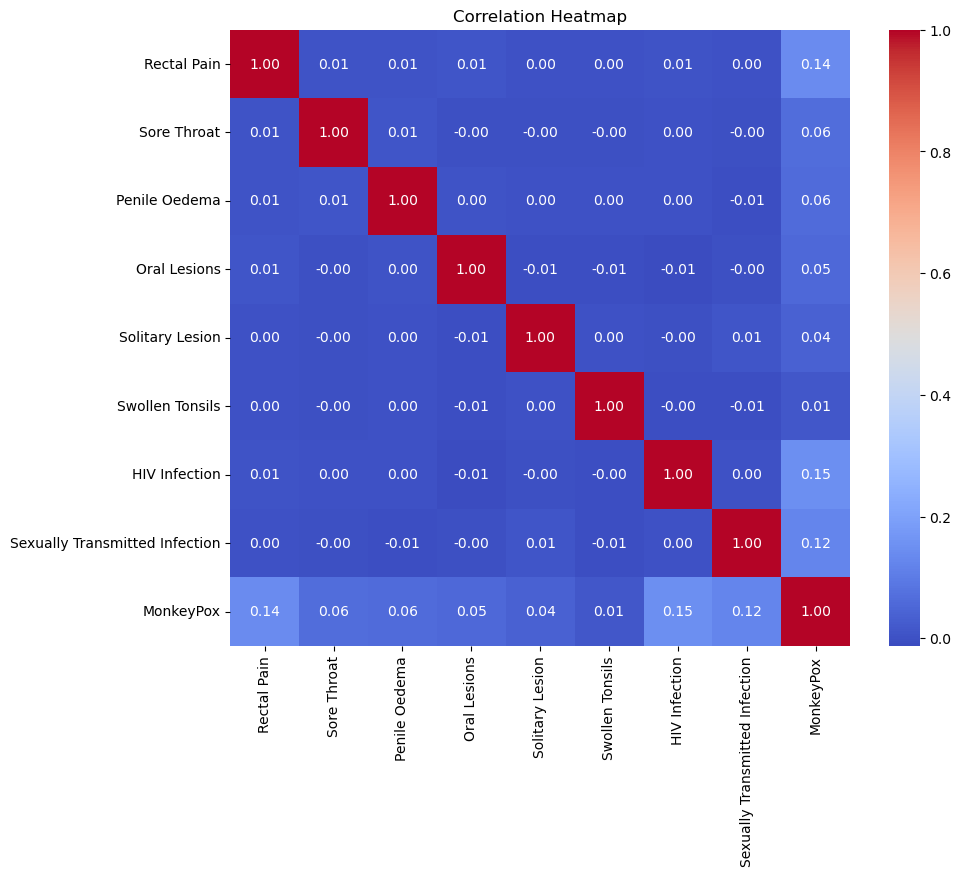

In [28]:
# Plot heatmap with correlation values formatted to 2 decimal places
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   Rectal Pain                             25000 non-null  int64
 1   Sore Throat                             25000 non-null  int64
 2   Penile Oedema                           25000 non-null  int64
 3   Oral Lesions                            25000 non-null  int64
 4   Solitary Lesion                         25000 non-null  int64
 5   Swollen Tonsils                         25000 non-null  int64
 6   HIV Infection                           25000 non-null  int64
 7   Sexually Transmitted Infection          25000 non-null  int64
 8   MonkeyPox                               25000 non-null  int64
 9   Systemic Illness_Fever                  25000 non-null  bool 
 10  Systemic Illness_Muscle Aches and Pain  25000 non-null  bool 
 11  Systemic Illnes

In [30]:
train.head()

,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox,Systemic Illness_Fever,Systemic Illness_Muscle Aches and Pain,Systemic Illness_Swollen Lymph Nodes,Systemic Illness_tidak
0,0,1,1,1,0,1,0,0,0,False,False,False,True
1,1,0,1,1,0,0,1,0,1,True,False,False,False
2,0,1,1,0,0,0,1,0,1,True,False,False,False
3,1,0,0,0,1,1,1,0,1,False,False,False,True
4,1,1,1,0,0,1,1,0,1,False,False,True,False


In [31]:
train

,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox,Systemic Illness_Fever,Systemic Illness_Muscle Aches and Pain,Systemic Illness_Swollen Lymph Nodes,Systemic Illness_tidak
0,0,1,1,1,0,1,0,0,0,False,False,False,True
1,1,0,1,1,0,0,1,0,1,True,False,False,False
2,0,1,1,0,0,0,1,0,1,True,False,False,False
3,1,0,0,0,1,1,1,0,1,False,False,False,True
4,1,1,1,0,0,1,1,0,1,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,1,1,0,1,1,0,0,1,1,False,False,False,True
24996,0,1,1,0,1,1,1,1,1,True,False,False,False
24997,1,1,0,0,1,1,0,0,1,False,False,False,True
24998,0,1,0,1,1,1,0,0,0,False,False,True,False


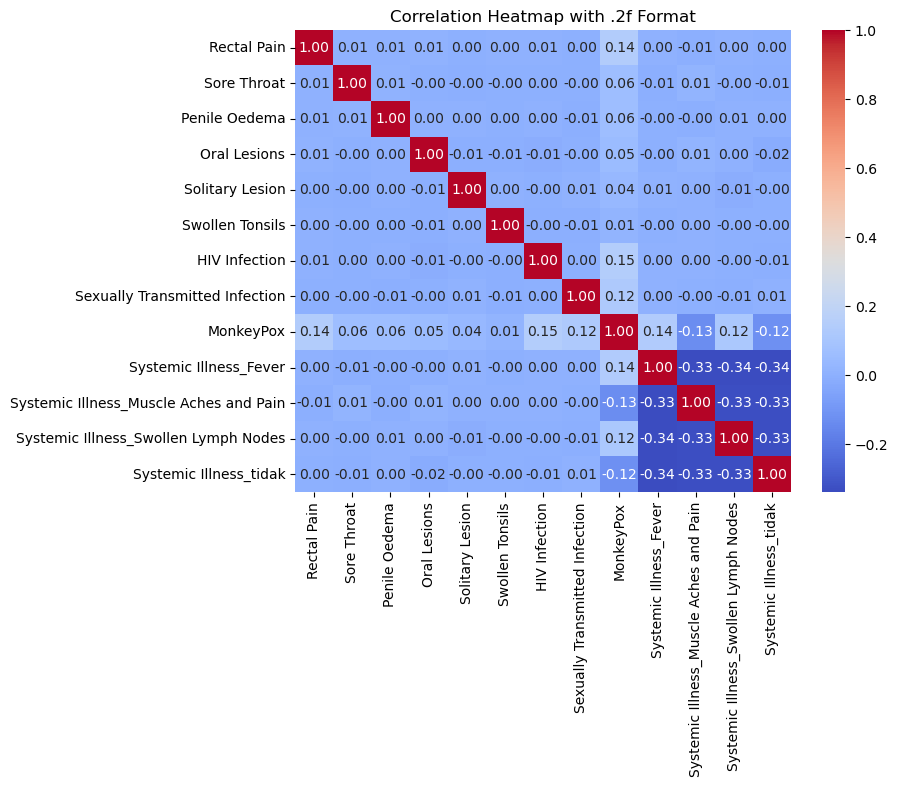

In [32]:
# Ensure all binary columns are numeric (they should be, but just in case)
train = train.astype({col: 'int64' for col in train.columns if 'Systemic Illness_' in col})

# Select only numeric columns again, ensuring that the newly encoded columns are included
numeric_df = train.select_dtypes(include=['number'])

# Generate the correlation matrix and plot the heatmap
corr = numeric_df.corr()

# Plot heatmap with correlation values formatted to 2 decimal places
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap with .2f Format')
plt.show()

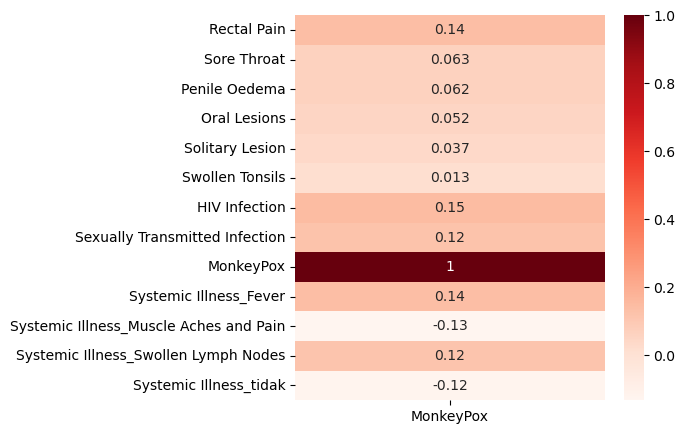

In [33]:
# Correlation with 'MonkeyPox'
target_correlation = train.corr()[['MonkeyPox']]
plt.figure(figsize=(5,5))
sns.heatmap(target_correlation, annot=True, cmap=plt.cm.Reds)
plt.show()

<Axes: xlabel='MonkeyPox'>

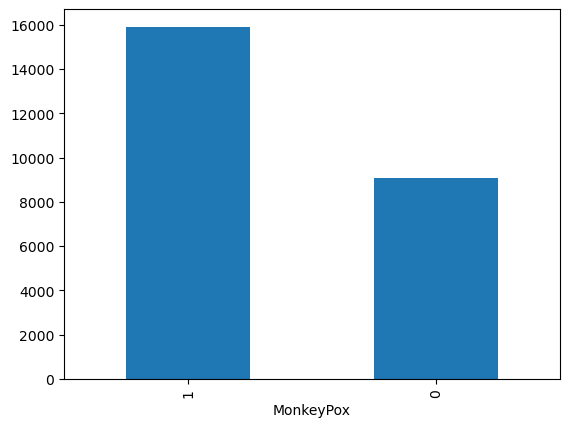

In [36]:
train['MonkeyPox'].value_counts().plot(kind='bar')

In [37]:
# Split data into features and target variable
X = train.drop(['MonkeyPox'], axis=1)
y = train['MonkeyPox']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [38]:
# Compute class weights to handle class imbalance
classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights_dict = dict(zip(classes, class_weights))

In [46]:
# Define hyperparameters for XGBoost (CPU)
paramsXGB = {
    'max_depth': 3,
    'learning_rate': 0.0157,
    'n_estimators': 100,
    'min_child_weight': 25,
    'gamma': 0.0001,
    'alpha': 7.148,
    'lambda': 0.137,
    'colsample_bytree': 0.796,
    'subsample': 0.638,
    'tree_method': 'hist',  # Use 'hist' for CPU
    'booster': 'gbtree',
    'random_state': 228,
    'use_label_encoder': False,
    'scale_pos_weight': class_weights_dict[1],
    'verbosity': 0
}

# Define hyperparameters for CatBoost (CPU)
paramsCB = {
    'depth': 3,
    'learning_rate': 0.0175,
    'iterations': 100,
    'max_bin': 461,
    'min_data_in_leaf': 162,
    'l2_leaf_reg': 0.027,
    'subsample': 0.689,
    'grow_policy': 'Depthwise',
    'leaf_estimation_method': 'Gradient',
    'bootstrap_type': 'Bernoulli',
    'random_seed': 228,
    'loss_function': 'Logloss',
    'task_type': 'CPU',  # Changed to 'CPU'
    'class_weights': class_weights.tolist(),
    'verbose': 0
}

# Define hyperparameters for LightGBM (CPU)
paramsLGBM = {
    'n_estimators': 100,
    'max_depth': 3,
    'learning_rate': 0.0165,
    'reg_alpha': 7.555,
    'reg_lambda': 0.953,
    'num_leaves': 155,
    'min_data_per_group': 177,
    'min_child_samples': 150,
    'colsample_bytree': 0.227,
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'random_state': 228,
    'device_type': 'cpu',  # Changed to 'cpu'
    'class_weight': class_weights_dict,
    'verbose': -1
}

# Define the estimators (CPU)
estimators = [
    ('lgb', LGBMClassifier(**paramsLGBM)),
    ('xgb', XGBClassifier(**paramsXGB)),
    ('cb', CatBoostClassifier(**paramsCB)),
    ('log', LogisticRegression(max_iter=200, solver='liblinear', verbose=0))  # Logistic Regression on CPU
]


In [47]:
# Define the final layer of stacking
final_layer = StackingClassifier(
    estimators=[
        ('lgb', LGBMClassifier(verbose=-1)),
        ('cat', CatBoostClassifier(verbose=0))
    ],
    final_estimator=LogisticRegression(max_iter=200, solver='liblinear', verbose=0)
)

In [48]:
# Define and train the stacking model
model = StackingClassifier(estimators=estimators, final_estimator=final_layer, cv=3, verbose=0)
model.fit(X_train, y_train)

StackingClassifier(cv=3,
                   estimators=[('lgb',
                                LGBMClassifier(class_weight={0: 1.3692794547224927,
                                                             1: 0.7875945113413609},
                                               colsample_bytree=0.227,
                                               device_type='cpu',
                                               learning_rate=0.0165,
                                               max_depth=3,
                                               min_child_samples=150,
                                               min_data_per_group=177,
                                               num_leaves=155,
                                               objective='binary',
                                               random_state=228,
                                               reg_alpha=7.555,
                                               reg_lambda=0.953, verbose=-1)),
                               ('xgb',
                                XGBClassifie...
                                              n_estimators=100, n_jobs=None, ...)),
                               ('cb',
                                <catboost.core.CatBoostClassifier object at 0x78a6d5011dc0>),
                               ('log',
                                LogisticRegression(max_iter=200,
                                                   solver='liblinear'))],
                   final_estimator=StackingClassifier(estimators=[('lgb',
                                                                   LGBMClassifier(verbose=-1)),
                                                                  ('cat',
                                                                   <catboost.core.CatBoostClassifier object at 0x78a6ed498620>)],
                                                      final_estimator=LogisticRegression(max_iter=200,
                                                                                         solver='liblinear')))

In [49]:
# Predict on train and test sets
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

In [50]:
# Calculate confusion matrix and accuracy
train_cm = confusion_matrix(y_train, train_preds)
test_cm = confusion_matrix(y_test, test_preds)
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

Training Accuracy: 69.48%
Test Accuracy: 70.84%


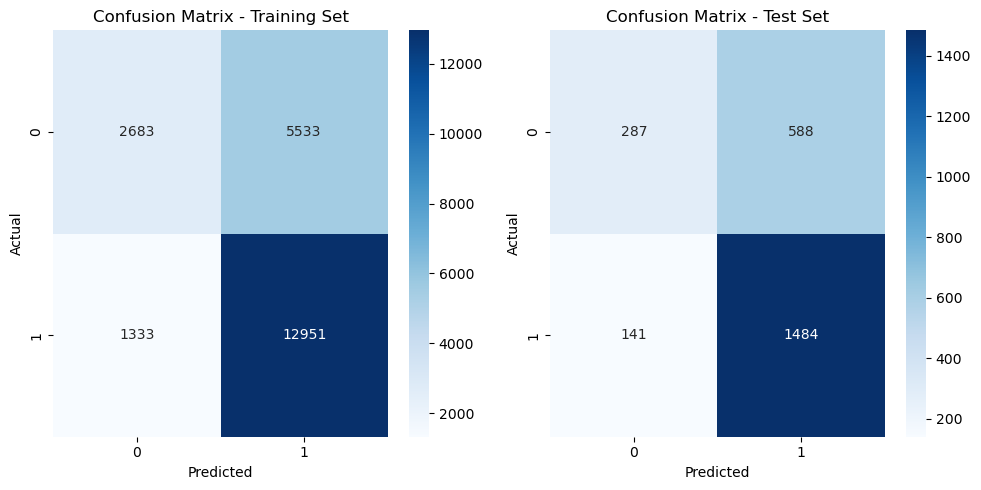

In [51]:
# Display accuracy results
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Plot confusion matrices
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Training Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.subplot(1, 2, 2)
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

# Visualization!

In [52]:
from sklearn.metrics import classification_report

# Generate a classification report
train_report = classification_report(y_train, train_preds, output_dict=True)
test_report = classification_report(y_test, test_preds, output_dict=True)

# Print the report to get an idea of the metrics
print("Training Metrics:\n", classification_report(y_train, train_preds))
print("Test Metrics:\n", classification_report(y_test, test_preds))


Training Metrics:
               precision    recall  f1-score   support

           0       0.67      0.33      0.44      8216
           1       0.70      0.91      0.79     14284

    accuracy                           0.69     22500
   macro avg       0.68      0.62      0.61     22500
weighted avg       0.69      0.69      0.66     22500

Test Metrics:
               precision    recall  f1-score   support

           0       0.67      0.33      0.44       875
           1       0.72      0.91      0.80      1625

    accuracy                           0.71      2500
   macro avg       0.69      0.62      0.62      2500
weighted avg       0.70      0.71      0.68      2500



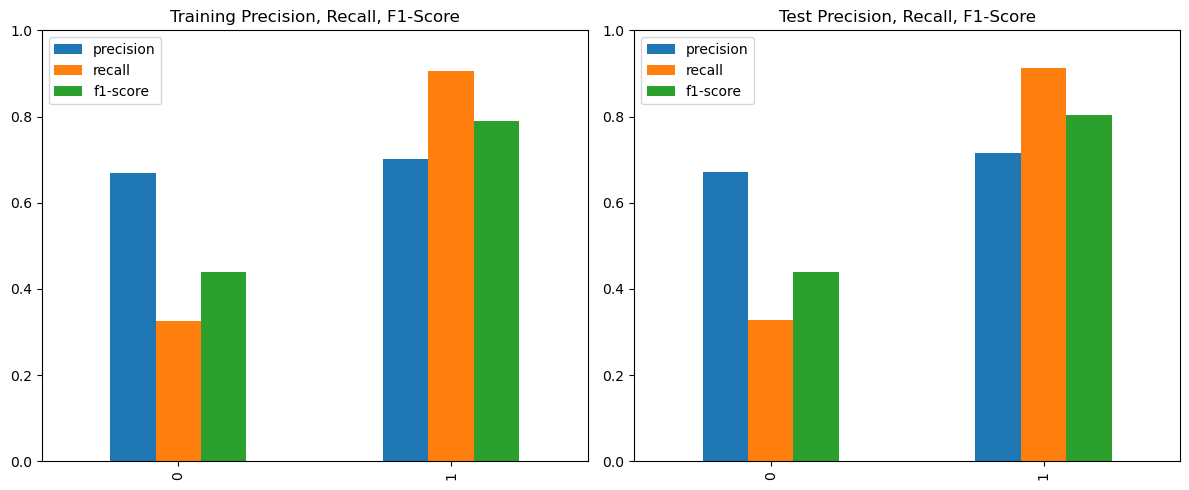

In [53]:
# Convert classification report dictionary to DataFrame for better plotting
train_metrics_df = pd.DataFrame(train_report).transpose()
test_metrics_df = pd.DataFrame(test_report).transpose()

# Plot precision, recall, and F1-score for both training and test sets
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot for training set
train_metrics_df[['precision', 'recall', 'f1-score']].iloc[:-3].plot(kind='bar', ax=axes[0])
axes[0].set_title('Training Precision, Recall, F1-Score')
axes[0].set_ylim([0, 1])

# Plot for test set
test_metrics_df[['precision', 'recall', 'f1-score']].iloc[:-3].plot(kind='bar', ax=axes[1])
axes[1].set_title('Test Precision, Recall, F1-Score')
axes[1].set_ylim([0, 1])

plt.tight_layout()
plt.show()


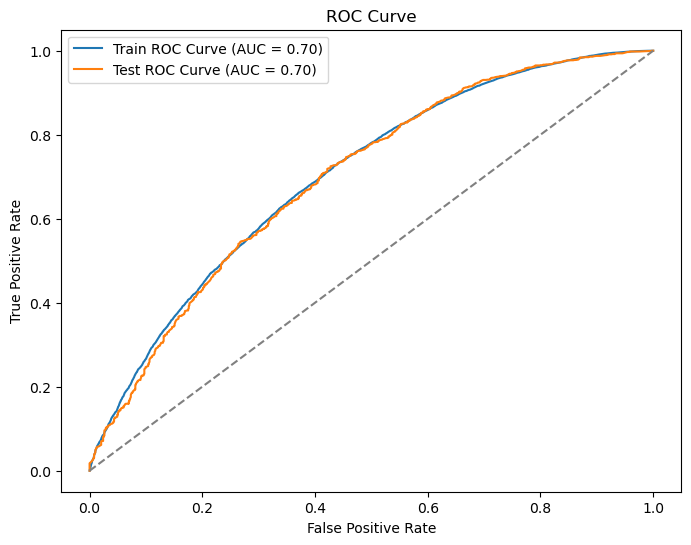

In [54]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curve and AUC for training set
train_fpr, train_tpr, _ = roc_curve(y_train, model.predict_proba(X_train)[:, 1])
train_auc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])

# Calculate ROC curve and AUC for test set
test_fpr, test_tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
test_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(train_fpr, train_tpr, label=f'Train ROC Curve (AUC = {train_auc:.2f})')
plt.plot(test_fpr, test_tpr, label=f'Test ROC Curve (AUC = {test_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


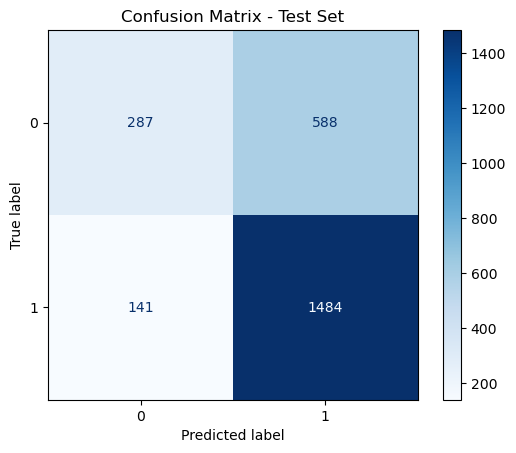

In [55]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix for the test set with labels
ConfusionMatrixDisplay.from_predictions(y_test, test_preds, cmap='Blues')
plt.title('Confusion Matrix - Test Set')
plt.show()
